<a href="https://colab.research.google.com/github/jeremybboy/Quantum_Machine_Learning/blob/main/QuantumML_1_Qiskit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### QUANTUM NEURAL NETWORK WITH QISKIT
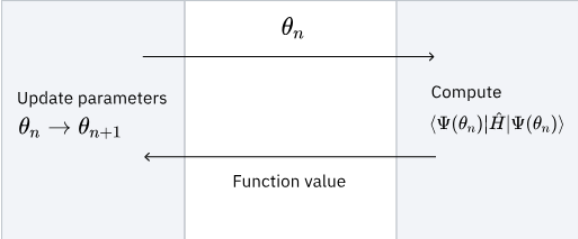


### This example demonstrates a regression problem solved using a quantum approach through a Quantum Neural Network (QNN). The focus is on using parameterized quantum circuits (with feature maps and ansatz) to model a simple regression task, rather than implementing a deep neural network with multiple layers or complex backpropagation. It's a good introductory example for Quantum ML.

The term "neural network" is used in Quantum Neural Networks (QNNs) because they follow a similar concept of parameterized optimization, much like classical neural networks. Both involve training a model by adjusting parameters to minimize a cost function.

However, in QNNs, instead of layers of neurons, we have quantum circuits with parameterized gates. These gates are optimized through classical algorithms. While the architecture differs, the overall goal of learning by parameter optimization is shared, which is why the analogy is made.

This Tutorial is largely inspired by the work of Naman Bansal (github link https://github.com/Nb4159).




In [1]:
!pip install qiskit
!pip install qiskit-algorithms
!pip install pylatexenc
!pip install qiskit-machine-learning==0.7.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=f577d6abac2b3817fd5e8bcfbbfdd0579260d7cd7902f96b829f03c02051144f
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import qiskit
from qiskit.visualization import plot_histogram


In [3]:
from qiskit import QuantumCircuit, transpile
#from qiskit.tools.jupyter import *
from qiskit.visualization import *

Parameterized Quantum Circuits

In a circuit we use gates with tunable paramters.

In [4]:
from qiskit.circuit import QuantumCircuit, ParameterVector
theta = ParameterVector('θ', length=2)

qc = QuantumCircuit(2)
qc.ry(theta[0], 0)#adds a Rotation-Y gate with parameter value Theta.
qc.cry(theta[1], 0, 1)# adds a Controlled Rotation-Y gate. The value of controlled Qubit-1 depends on Qubit 0
qc.draw()

┌──────────┐            
q_0: ┤ Ry(θ[0]) ├─────■──────
     └──────────┘┌────┴─────┐
q_1: ────────────┤ Ry(θ[1]) ├
                 └──────────┘

To use parameterized quantum circuits as a machine learning model, we need them to generalize well. This means that the circuit should be able to generate a significant subset of the states within the output Hilbert space. (In quantum mechanics the state of a physical system is represented by a vector in a Hilbert space: a complex vector space with an inner product. The term Hilbert space is often reserved for an infinite-dimensional inner product space having the property that it is complete or closed.) The expressibility of a parameterized quantum circuit is essentially the coverage of the Hilbert space by the circuit's hypothesis space. Highly expressive parameterized quantum circuits can represent many different unitaries,that is they are more generalizable

In quantum machine learning, parameterized quantum circuits tend to be used for two things:

      To encode data, where the parameters are determined by the data being encoded
      As a quantum model, where the parameters are determined by an optimization process.
In machine learning(both classical and Quantum), pattern recognition and image processing, a feature map starts from an initial set of measured data and builds derived values (also known as features) intended to be informative and non-redundant, facilitating the subsequent learning and generalization steps, and in some cases leading to better human interpretations. Feature Maps also Help in Dimensionality Reduction.

###ZZ Feature Map

ZZ Feature Map is aFeature map in Qiskit.It's used to encode classical data (like numbers or text) into a quantum state by applying specific operations on qubits. It encodes second-order interactions between classical data points onto a quantum state. This means it captures relationships between pairs of features in our data.t utilizes controlled Z-rotations (CZ gates) to encode these interactions.

In [5]:
from qiskit.circuit.library import ZZFeatureMap
qc_zz = ZZFeatureMap(3, reps=1, insert_barriers=True)
qc_zz.decompose().draw()

┌───┐ ░ ┌─────────────┐                                               »
q_0: ┤ H ├─░─┤ P(2.0*x[0]) ├──■────────────────────────────────────■────■──»
     ├───┤ ░ ├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐  │  »
q_1: ┤ H ├─░─┤ P(2.0*x[1]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├──┼──»
     ├───┤ ░ ├─────────────┤└───┘└──────────────────────────────┘└───┘┌─┴─┐»
q_2: ┤ H ├─░─┤ P(2.0*x[2]) ├──────────────────────────────────────────┤ X ├»
     └───┘ ░ └─────────────┘                                          └───┘»
«                                               »
«q_0: ──────────────────────────────────■───────»
«                                       │       »
«q_1: ──────────────────────────────────┼────■──»
«     ┌──────────────────────────────┐┌─┴─┐┌─┴─┐»
«q_2: ┤ P(2.0*(π - x[0])*(π - x[2])) ├┤ X ├┤ X ├»
«     └──────────────────────────────┘└───┘└───┘»
«                                          
«q_0: ─────────────────────────────────────
«                                          
«q_1: ──────────────────────────────────■──
«     ┌──────────────────────────────┐┌─┴─┐
«q_2: ┤ P(2.0*(π - x[1])*(π - x[2])) ├┤ X ├
«     └──────────────────────────────┘└───┘

Now we can create a Paramterized circuit in Qiksit using frameworks like TwoLocal,NLocal,QAOA ,etc.

##Training of Parameterized QCs


Training of QCs is somewhat similar to that of classical machine learning methods, that is we can mathematically express the learning process as minimization of cost function/loss fucntion(The objective function). In QML,we try to minimise the expectation value

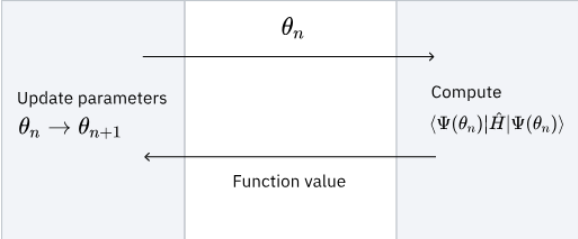


Now just like classical Machine Learning we can use both ML algorithms and Neural Networks. This notebook however focuses on Neural Networks.

Now Classical NNs were inspired from the human brain and made to solve Complex problems and are building blocks for a number of applications like Computer Vision, Natural Language Processing, Speech Processing etc. Quantum Neural Networks aims to leverage Quantum Computing.

QNNs work on parameterized quantum circuits that are trianed in VAriantional manner using classical optimizers. These circuits contain feature map(with input parameters) and an ansatz(the trainable weights). We have reduced the QNNs to our belved Classical NNs.

We can use qiskit primitives to run QNNs as either simulations or even on real Quantum Hardware (though there is a queue that your job has to enter in order to execute on a real device and you also need to login to IBM Qiskit). The NeuralNetwork class is the interface for all QNNs available in qiskit-machine-learning. It exposes a forward and a backward pass that take data samples and trainable weights as input.

It’s important to note that NeuralNetworks are “stateless”. They do not contain any training capabilities (these are pushed to the actual algorithms or applications: classifiers, regressors, etc), nor do they store the values for trainable weights

In [14]:
from qiskit_algorithms.utils import algorithm_globals

algorithm_globals.random_seed = 42# The random seed from Classical ML

##EstimatorQNN



Estimator QNN is one of the way used to initialise a QNN. It takes a paramterized quantum circuit as input as well as list of optional Observables and outputs the expectation value. We can also provide a list of observables to further complicate our NN.(In quantum mechanics, an observable is an operator, where the property of the quantum state can be determined by some sequence of operations.)

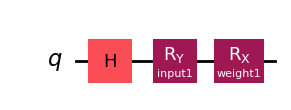

In [15]:
from qiskit.circuit import Parameter
from qiskit import QuantumCircuit

params1 = [Parameter("input1"), Parameter("weight1")]
qc = QuantumCircuit(1)
qc.h(0)
qc.ry(params1[0], 0)
qc.rx(params1[1], 0)
qc.draw("mpl")

In [16]:
#Creating an observable

from qiskit.quantum_info import SparsePauliOp

observable1 = SparsePauliOp.from_list([("Y" * qc.num_qubits, 1)])# If nothing is passecd It uses a "Z" Observable

Together with the quantum circuit defined above, and the observable we have created, the EstimatorQNN constructor takes in the following keyword arguments:

  estimator: optional primitive instance

  input_params: list of quantum circuit parameters that should be treated as “network inputs”

  weight_params: list of quantum circuit parameters that should be treated as “network weights”

If we want to use cloud resources or use Aer simulators we would have to use the Estimator instance to pass into EstimatorQNN.

In [17]:
from qiskit_machine_learning.neural_networks import EstimatorQNN

estimator_qnn = EstimatorQNN(
    circuit=qc, observables=observable1, input_params=[params1[0]], weight_params=[params1[1]]
)
estimator_qnn

We can also use SamplerQNN as an alternative to EstimatorQNN. It does not require us to use a custom observable.

input parameters: ['input[0]', 'input[1]']
weight parameters: ['weight[0]', 'weight[1]', 'weight[2]', 'weight[3]']


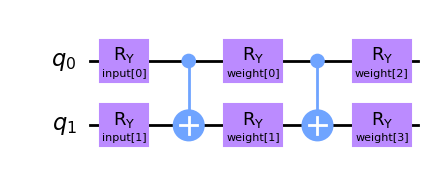

In [18]:
from qiskit.circuit import ParameterVector

inputs2 = ParameterVector("input", 2)
weights2 = ParameterVector("weight", 4)
print(f"input parameters: {[str(item) for item in inputs2.params]}")
print(f"weight parameters: {[str(item) for item in weights2.params]}")

qc2 = QuantumCircuit(2)
qc2.ry(inputs2[0], 0)
qc2.ry(inputs2[1], 1)
qc2.cx(0, 1)
qc2.ry(weights2[0], 0)
qc2.ry(weights2[1], 1)
qc2.cx(0, 1)
qc2.ry(weights2[2], 0)
qc2.ry(weights2[3], 1)

qc2.draw("mpl", style="clifford")

In [19]:
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit.circuit import ParameterVector

sampler_qnn = SamplerQNN(circuit=qc2, input_params=inputs2, weight_params=weights2)
sampler_qnn

Now we are going more into our classical field, one we are so familiar with.: The Forward Pass

In [20]:
sampler_qnn_ip = algorithm_globals.random.random(sampler_qnn.num_inputs)
sampler_qnn_wts = algorithm_globals.random.random(sampler_qnn.num_weights)
print(f"Number of input features for SamplerQNN: {sampler_qnn.num_inputs} \n Input: {sampler_qnn_ip}")
print(f"Number of trainable weights for SamplerQNN: {sampler_qnn.num_weights} \n Weights: {sampler_qnn_wts}")

Number of input features for SamplerQNN: 2 
 Input: [0.77395605 0.43887844]
Number of trainable weights for SamplerQNN: 4 
 Weights: [0.85859792 0.69736803 0.09417735 0.97562235]


For the EstimatorQNN, the expected output shape for the forward pass is (batch_size, num_qubits num_observables). For the SamplerQNN (without a custom interpret function), the expected output shape for the forward pass is (1, 2 num_qubits). With a custom interpret function, the output shape will be (1, output_shape), where 1 in our case is the number of samples.

In [21]:
sampler_qnn_forward = sampler_qnn.forward(sampler_qnn_ip, sampler_qnn_wts)

print(f"Forward pass result for SamplerQNN: {sampler_qnn_forward}.  \nShape: {sampler_qnn_forward.shape}")

Forward pass result for SamplerQNN: [[0.23851185 0.1411135  0.3367757  0.28359895]].  
Shape: (1, 4)


So we have our weights for the forward pass. We have gone through half of our step for the training of a Neural Networks. The next step again is a pretty familiar category : The Backward Pass

For the SamplerQNN (without custom interpret function), the expected output shape for the forward pass is (batch_size, 2* num_qubits, num_weights). With a custom interpret function, the output shape will be (batch_size, output_shape, num_weights). Now we can put gradient as True or False(default). Here I will be setting it True.

In [22]:
sampler_qnn.input_gradients = True
sampler_qnn_ip_grad, sampler_qnn_weight_grad = sampler_qnn.backward(sampler_qnn_ip, sampler_qnn_wts)

print(f"Input gradients for SamplerQNN: {sampler_qnn_ip_grad}.  \nShape: {sampler_qnn_ip_grad}")
print(f"Weight gradients for SamplerQNN: {sampler_qnn_weight_grad}.  \nShape: {sampler_qnn_weight_grad.shape}")

Input gradients for SamplerQNN: [[[ 0.00854017 -0.4260793 ]
  [ 0.29208826  0.08375938]
  [-0.35915753  0.17972714]
  [ 0.05852911  0.16259278]]].  
Shape: [[[ 0.00854017 -0.4260793 ]
  [ 0.29208826  0.08375938]
  [-0.35915753  0.17972714]
  [ 0.05852911  0.16259278]]]
Weight gradients for SamplerQNN: [[[ 0.00609879 -0.30661818 -0.1834591  -0.28341665]
  [-0.02969169  0.17866236  0.1834591  -0.20004909]
  [-0.37812738  0.30266095 -0.30904568  0.28341665]
  [ 0.40172028 -0.17470512  0.30904568  0.20004909]]].  
Shape: (1, 4, 4)


## Regression

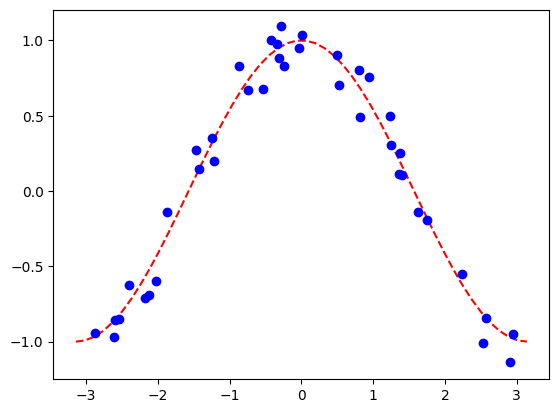

In [24]:
import numpy as np
import matplotlib.pyplot as plt


num_samples = 40
eps = 0.2
lb, ub = -np.pi, np.pi
X_ = np.linspace(lb, ub, num=50).reshape(50, 1)
f = lambda x:np.cos(x)

X = (ub - lb) * algorithm_globals.random.random([num_samples, 1]) + lb
y = f(X[:, 0]) + eps * (2 * algorithm_globals.random.random(num_samples) - 1)

plt.plot(X_, f(X_), "r--")
plt.plot(X, y, "bo")
plt.show()

In [25]:
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit_algorithms.utils import algorithm_globals

from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
#from qiskit_machine_learning.circuit.library import QNNCircuit
from qiskit_machine_learning.circuit.library import QNNCircuit

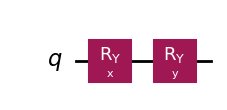

In [ ]:
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()
param_x = Parameter("x")
feature_map = QuantumCircuit(1, name="fm")
feature_map.ry(param_x, 0)

# construct simple ansatz
param_y = Parameter("y")
ansatz = QuantumCircuit(1, name="vf")
ansatz.ry(param_y, 0)

qc = QNNCircuit(feature_map=feature_map, ansatz=ansatz)

#Here we can use our built-in Feature maps and Ansatz as well however given that this is a simple problem we can use these custom made ones as well. Also this gives us a idea that they are really not some difficult terms and how they look like at the small scale
regression_estimator_qnn = EstimatorQNN(circuit=qc)
# construct the regressor from the Quantum neural network
regressor = NeuralNetworkRegressor(
    neural_network=regression_estimator_qnn,
    loss="squared_error",
    optimizer=L_BFGS_B(maxiter=50),
    callback=callback_graph,
)

qc.draw("mpl")

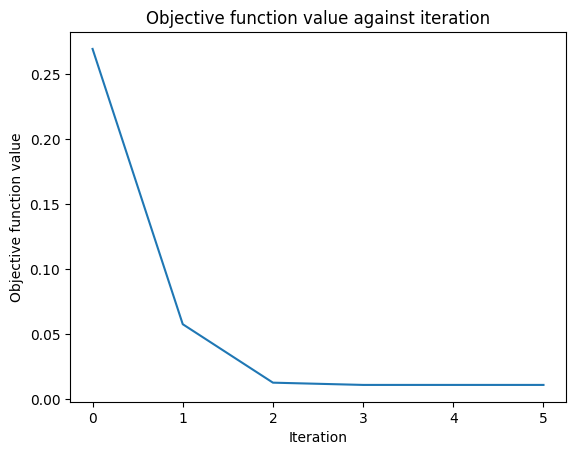

0.9756227572998851

In [ ]:
objective_func_vals = []
regressor.fit(X, y)
regressor.score(X, y)

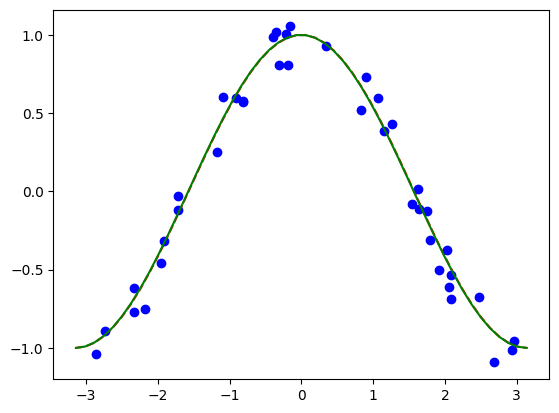

In [ ]:
plt.plot(X_, f(X_), "r--")
plt.plot(X, y, "bo")
y_ = regressor.predict(X_)
plt.plot(X_, y_, "g-")#plotting fitted line
plt.show()

We can clearly see that our score is pretty low even on simple data(I know it is 97% in this case, but I also tried it on asimple 5 * cos(x) and the score reduced so drastically, you can try any function of your choice and see the result).I personally feel that it is the simplicity of the model that has resulted in not so great score.However,even after using a better model(for more complex tasks) we are generally not able to match the scores of classical ML algos. This is because QML is a field in its infant stage and although it is catching up, I feel it would take sometime more to reach current levels, althouh we alraedy have all the fields of classical AI in Quantum Domain as well like Computer Vision,GANs,NPLs,etc.